#                                         Thyroid Disease Prediction

## Abstract
Thyroid disease (TD) is one of the most progressive endocrine disorders in the human population today. According to statistics, thyroid disorders are on the rise in India. Approximately 1 in 10 Indian adults suffer from hypothyroidism, a condition in which the thyroid gland does not produce enough thyroid hormones to meet the needs of the body. And also one-third of thyroid patients are unaware of their condition. Prediction of endocrine disease is a critical task in the field of clinical data analysis.

Machine Learning (ML) has shown effective results in the decision-making and predictions from the enormous data generated by the healthcare domain. This project has proposed four models based on the primary thyroid disease dataset collected from 3772 patients. In these models, we have compared  4 ML algorithms ( Logistic Regression, KNN, Support Vector Machine, Decision Tree) for effective classification and built an optimum model to predict hypothyroidism disease.

### Data Definition

**Age**: Age of the patient - (Numerical)

**Sex**: Gender of the patient - (Male, Female) - (Categorical)

**On Thyroxine**: Details of patients whether taking thyroxine medication or not, 
                   which is used to treat hypothyroidism - (T, F) - (Categorical)   
                   
**Query on thyroxine**: Checking whether the patient taking thyroxine or not - (T, F) - (Categorical)

**On Antithyroid Medication**: Details of patients whether taking an antithyroid medication or not,
                                 which is used to treat hyperthyroidism - (T, F) -(Categorical)
                                 
**Sick**: Details of patients whether they are sick or not - (T, F) - (Categorical)

**Pregnant**: Details of patients whether they are pregnant or not - (T, F) - (Categorical)

**Thyroid Surgery**: Details of patients whether they have undergone thyroid surgery or not - (T, F) -(Categorical)

**I131 Treatment**: Details of patients whether taking I131 treatment  or not,
                     which is used to treat hyperthyroidism or thyroid cancer - (T, F) - (Categorical)
                     
**Query Hypothyroid**: Checking whether the patient has hypothyroid or not - (T, F) - (Categorical)

**Query Hyperthyroid**: Checking whether the patient has hyperthyroid or not - (T, F) - (Categorical)

**Lithium**: The presence of lithium inpatient or not - (T, F) - (Categorical)

**Goitre**: The presence of goitre inpatient or not - (T, F) - (Categorical)

**Tumor**: The presence of tumor inpatient or not - (T, F) - (Categorical) 

**Hypopituitary**: The presence of hypopituitary inpatient or not - (T, F) - (Categorical) 

**Psych**: The presence of psych inpatient or not - (T, F) - (Categorical) 

**TSH measured**: Checking whether TSH is measured inpatient or not - (T, F) - (Categorical)

**TSH**: Patient's TSH level (mIU/L) - (Numerical) 

**T3 measured**: Checking whether T3 is measured inpatient or not - (T, F) - (Categorical)

**T3**:  Patient's T3 level (ng/dl) - (Numerical)

**TT4 measured**: Checking whether TT4 is measured inpatient or not - (T, F) - (Categorical)

**TT4**: Patient's TT4 level (μg/dL) - (Numerical)

**T4U measured**: Checking whether T4U is measured inpatient or not - (T, F) - (Categorical) 

**T4U**: Patient's T4U level  - (Numerical)

**FTI measured**: Checking whether FTI is measured inpatient or not - (T, F) - (Categorical) 

**FTI**: Patient's FTI level  - (Numerical)

**TBG measured**: Checking whether TBG is measured inpatient or not - (T, F) - (Categorical)  

**TBG**: Patient's TT4 level (mg/dl) - (Numerical) 

**Referral source**: Patient's referral source - (Categorical)

**BinaryClass**: Patient has Thyroid disease or not - (1=P, 0=N) - (Target variable)


## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Read Data from csv](#RD)**
3. **[Exploratory Data Analysis](#data_preparation)**
    - 3.1 - **[Understand the Dataset](#Data_Understanding)**
    - 3.2 - **[Data Type](#Data_Type)**
    - 3.3 - **[Prepare the Data](#Data_Preparation)**
    - 3.4 - **[Checking for Missing Values](#Missing_Values)**
    - 3.5 - **[Discover Outliers](#Outliers)**
    - 3.6 - **[Distribution of Variables](#Distribution_of_Variables)**
    - 3.7 - **[Correlation](#Correlation)**
    - 3.8 - **[Dummy encode the categorical variables](#get_dummies)**
4. **[Selecting important features based on Random Forest](#feature_selection)**
    - 4.1 - **[Split the data into 75% test and 25% training](#data_split)**
    - 4.2 - **[Train A Random Forest Classifier](#RF)**
    - 4.3 - **[Identify And Select Most Important Features](#important_features)**
    - 4.4 - **[Visualizing Important Features using Random Forest](#visualize_important_features)**
    - 4.5 - **[Create A Data Subset With Only The Most Important Features](#subset_important_features)**
5. **[Handling unbalanced data using SMOTE](#smote)**
6. **[Standardize the data using minmax scaler](#minmax_scaler)**
7. **[ Build the following Supervised Learning models](#model_building)**
    - 7.1 - **[Logistic Regression](#LogisticRegression)**
    - 7.2 - **[K-Nearest Neighbors](#KNN)**
    - 7.3 - **[Support Vector Machine](#SVM)**
    - 7.4 - **[Decision Tree](#DecisionTree)**
8. **[Conclusion and Interpretation](#conclusion)**

## 1.Import Libraries

In [1]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2.Read data from csv

Read and display data to get an insight into the data.

In [2]:
# read the excel data file 
Thyroid_df = pd.read_csv("hypothyroid.csv")

# display the top 5 rows of the dataframe
Thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


## 3. Exploratory Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers
7. Check for missing values

In [3]:
# replacing "?" with Nan
Thyroid_df.replace("?",np.nan,inplace=True)
Thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,P


### 3.1 - Understand the Dataset

#### 1 Check for shape of dataframe

In [4]:
#check for shape of dataframe
Thyroid_df.shape

(3772, 30)

**Inference**: We see the data frame has 30 columns and 3772 observation

#### 2 Summary Statistics

In [5]:
Thyroid_df.describe()

,TBG
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


### 3.2 Data Type
The main data types in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column

#### 1 Check for the data type

In [6]:
# "dtypes" gives data type of each columns
Thyroid_df.dtypes

age                           object
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                           object
T3 measured                   object
T3                            object
TT4 measured                  object
TT4                           object
T4U measured                  object
T4U                           object
FTI measured                  object
FTI                           object
TBG measured                  object
T

**Inference**: From the above output, it is clear to see that the data type of variables "TBG" is 'float64', and the rest of the variables are identified as categorical.

But as per data attribute information we have, "age", "FTI", "TSH", "T3", "TT4", "T4U"  variables are numerical, which are wrongly interpreted as categorical, so we convert these variables into "numeric" data type.

#### 2 Change the incorrect data type.

In [7]:
# use "for" loop to change the data type of variables 
for col in ["age","FTI","TSH","T3","TT4","T4U"]:
    Thyroid_df[col] = pd.to_numeric(Thyroid_df[col])

#### 3 Recheck the data type after the conversion.

In [8]:
# Recheck the data type after conversion.
Thyroid_df.dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

**Inference**: Now we have all the variables with corrected data types as required.

In [9]:
Thyroid_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [10]:
# display the top 5 rows of the dataframe after conversion
Thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


### 3.3 Prepare the Data

#### 1 Changing the column name 

In [11]:
#Changing the column name
Thyroid_df.rename(columns={"binaryClass":"Target"},inplace=True)

#### 2 Replacing target variable to 1 & 0 

In [12]:
#Replacing target variable to 1 & 0 
Thyroid_df["Target"] = Thyroid_df["Target"].replace({"P":1,"N":0})

#### 3 Replacing gender  feature from "F" & "M" to 1 & 0 

In [13]:
# Replacing gender  feature from "F" & "M" to 1 & 0 
Thyroid_df["sex"] = Thyroid_df["sex"].replace({"F":1,"M":0})

#### 4 Replacing all boolean  from "t" & "f" to 1 & 0 

In [14]:
## Replacing Boolean values "t" and "f" to  1 and 0
Thyroid_df = Thyroid_df.replace({"t":1,"f":0})

In [15]:
# display the top 5 rows of the dataframe after conversion
Thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Target
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,102.0,0,NaN,0,NaN,0,NaN,other,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,175.0,0,NaN,0,NaN,0,NaN,other,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,1


### 3.4 Checking for Missing Values

First, run a check for the presence of missing values for each column. Then choose the right approach to remove them.

In [16]:
# sort the variables on the basis of total null values in the variable
# "isnull().sum()"" returns the number of missing values in each variable
# "ascending = False" sorts values in the descending order
# the variable with highest number of missing values will appear first
Thyroid_df.isnull().sum().sort_values(ascending = False)

TBG                          3772
T3                            769
T4U                           387
FTI                           385
TSH                           369
TT4                           231
sex                           150
age                             1
referral source                 0
TBG measured                    0
FTI measured                    0
T4U measured                    0
TT4 measured                    0
T3 measured                     0
TSH measured                    0
psych                           0
hypopituitary                   0
tumor                           0
goitre                          0
lithium                         0
query hyperthyroid              0
query hypothyroid               0
I131 treatment                  0
thyroid surgery                 0
pregnant                        0
sick                            0
on antithyroid medication       0
query on thyroxine              0
on thyroxine                    0
Target        

**Inference**: The variable "TBG" has complete missing values So maybe removing these variables will be a good option
The variables "age","TSH","T3","TT4","T4U","FTI","sex",  has few  missing values which can be replaced using mean etc.

#### 1 visualization of missing values

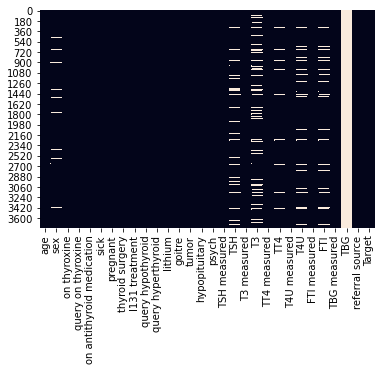

In [17]:
# plot heatmap to check null values
# "cbar = False" does not show the color axis 
sns.heatmap(Thyroid_df.isnull(), cbar=False)

# display the plot
plt.show()

**Inference**: There are horizontal lines in the heatmap for "age","TSH","T3","TT4","T4U","FTI","sex","TBG", which would correspond to probable missing values.

#### .2 Missing value treatment

In [18]:
# use the "for" loop for filling missing values with  a mean in the following 6 columns 
for col in ["age","TSH","T3","TT4","T4U","FTI"]:
    Thyroid_df[col] = Thyroid_df[col].fillna(Thyroid_df[col].mean())
    

In [19]:
# "sex"  has few missing  values, replace it with a median
Thyroid_df["sex"] = Thyroid_df["sex"].fillna(Thyroid_df["sex"].median())

In [20]:
# "TBG" & "TBG measured" dropping these columns using drop() 
Thyroid_df.drop(["TBG measured","TBG"], axis=1, inplace=True)

#### 3 visualization of missing values after treatment

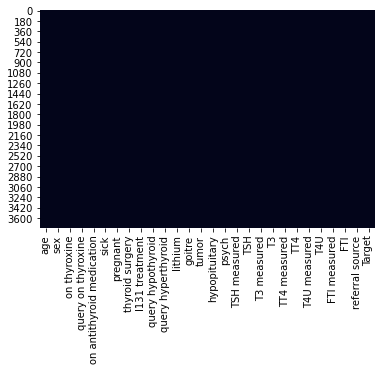

In [21]:
#plotting heatmap after treatment
sns.heatmap(Thyroid_df.isnull(), cbar=False)
# display the plot
plt.show()

### 3.5 Discover Outliers

Importance of detecting an outlier

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

#### 1 Plot the boxplot for "age"

<AxesSubplot:>

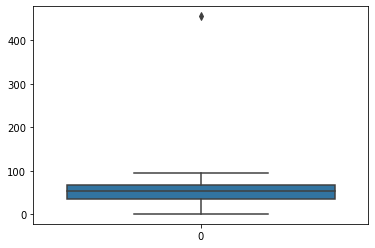

In [22]:
# plot boxplot
sns.boxplot( data=Thyroid_df["age"])

**Inference**: There is only one outiler present in age which more than 400

#### 2  Removing outlier using drop()

In [23]:
#Removing outlier using drop()
Thyroid_df.drop(Thyroid_df[Thyroid_df["age"] >= 100].index, inplace=True)

In [24]:
Thyroid_df["age"].shape

(3771,)

#### 3  Plot the boxplot to recheck for outliers

<AxesSubplot:>

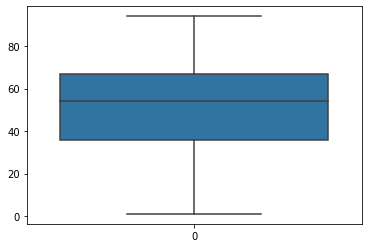

In [25]:
sns.boxplot( data=Thyroid_df["age"])

### 3.6 Distribution of Variables

#### 1 Distribution of numeric independent variables.
For the independent numeric variables, we plot the histogram to check the distribution of the variables.

count    3771.000000
mean       51.628941
std        18.980472
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max        94.000000
Name: age, dtype: float64


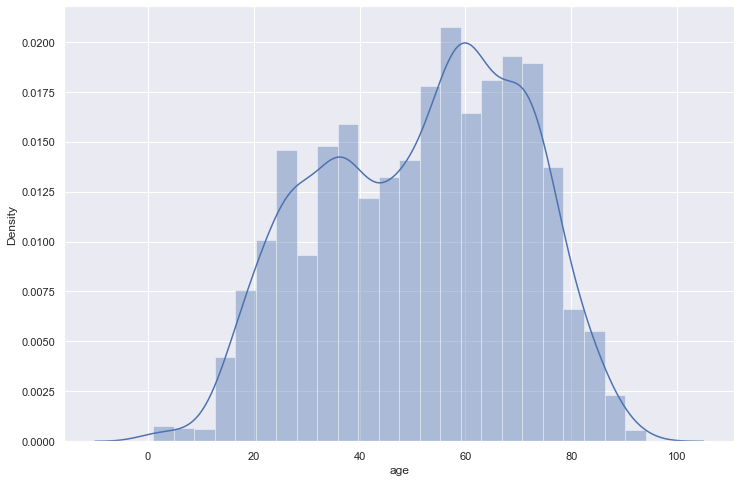

In [26]:
print(Thyroid_df.age.describe())
sns.set(rc={"figure.figsize": (12, 8)})

ax = sns.distplot(Thyroid_df["age"])

# display the plot
plt.show()

**Inference**: The variable "age" is near normally distributed 
So the minimum value of age  is 1 and the maximum is 94, but on average it is 51 

count    3771.000000
mean        2.013503
std         0.738360
min         0.050000
25%         1.700000
50%         2.013500
75%         2.200000
max        10.600000
Name: T3, dtype: float64
count    3771.000000
mean      108.316778
std        34.500726
min         2.000000
25%        89.000000
50%       106.000000
75%       123.000000
max       430.000000
Name: TT4, dtype: float64
count    3771.000000
mean        0.994964
std         0.185168
min         0.250000
25%         0.890000
50%         0.995000
75%         1.070000
max         2.320000
Name: T4U, dtype: float64
count    3771.000000
mean      110.471364
std        31.359068
min         2.000000
25%        94.000000
50%       110.000000
75%       121.500000
max       395.000000
Name: FTI, dtype: float64


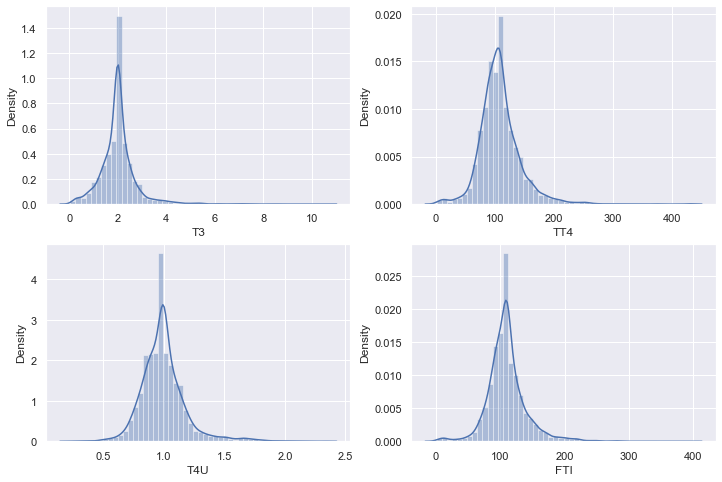

In [27]:
print(Thyroid_df.T3.describe())
print(Thyroid_df.TT4.describe())
print(Thyroid_df.T4U.describe())
print(Thyroid_df.FTI.describe())

plt.subplot(2,2,1)
sns.distplot(Thyroid_df["T3"])

plt.subplot(2,2,2)
sns.distplot(Thyroid_df["TT4"])

plt.subplot(2,2,3)
sns.distplot(Thyroid_df["T4U"])

plt.subplot(2,2,4)
sns.distplot(Thyroid_df["FTI"])

# display the plot
plt.show()

**Inference**: It can be seen that the variable "T3", "TT4", "T4U", "FTI" have slight right skew, but has a right tail. They are almost near normally distrubuted.

So the minimum value of T3  is 0.05 and the maximum is 10.6, but on average it is 2.01

So the minimum value of TT4  is 2 and the maximum is 430, but on average it is 0.99

So the minimum value of T4U  is 0.25 and the maximum is 2.23, but on average it is 0.99 

So the minimum value of FTI  is 2 and the maximum is 395, but on average it is 110.47

#### 2 Distribution of dependent variable.

1    3480
0     291
Name: Target, dtype: int64


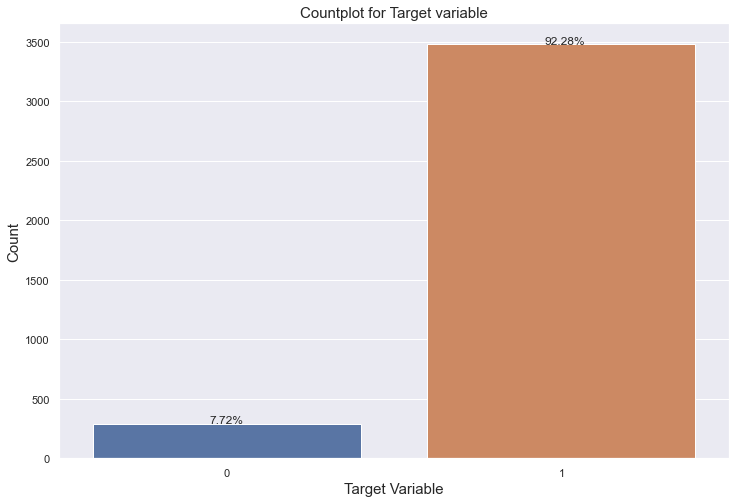

In [28]:
# get counts of 0's and 1's in the "target" variable using "value_counts()"
# store the values in "class_frequency"
class_frequency = Thyroid_df["Target"].value_counts()
print(class_frequency)

# plot the countplot of the variable "target"
sns.countplot(x=Thyroid_df.Target)

# use below code to print the values in the graph
# "x" and "y" gives position of the text
# "s" is the text on the plot
plt.text(x = -0.05, y = Thyroid_df.Target.value_counts()[0],
         s = str(round((class_frequency[0])*100/len(Thyroid_df.Target),2)) + '%')
plt.text(x = 0.95, y = Thyroid_df.Target.value_counts()[1],
         s = str(round((class_frequency[1])*100/len(Thyroid_df.Target),2)) + '%')

# add plot and axes labels
# set text size using "fontsize"
plt.title("Countplot for Target variable", fontsize = 15)
plt.xlabel("Target Variable", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# to show the plot
plt.show()

**Inference**: There are a total of 7.72% of patients do not have the disease, and 92.28% of patients are affected by Hypothyroidism. We see that there is a  huge imbalance between the two classes of the target variable. Can be handled using smote.

#### 3 Distribution of Positive Cases Based on Age

In [29]:
positive_df = Thyroid_df[Thyroid_df.Target == 1]
positive_df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Target
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,SVHC,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,other,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,other,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,other,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,other,1
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,SVI,1
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,other,1
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,SVI,1


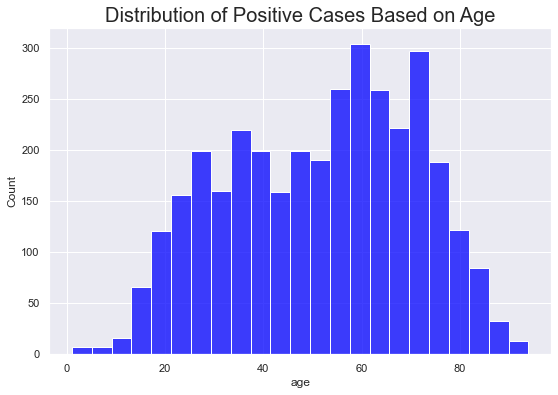

In [30]:
plt.figure(figsize=(9,6))
sns.histplot(x="age",data=positive_df,color="blue")
plt.title("Distribution of Positive Cases Based on Age",{"fontsize":20})
# to show the plot
plt.show()

**Inference** : 
This condition affects people of all age groups but 
 most patients who suffer from thyroid belonging to the  age group between 20-70

#### 4 Distribution of Positive Cases Based on gender

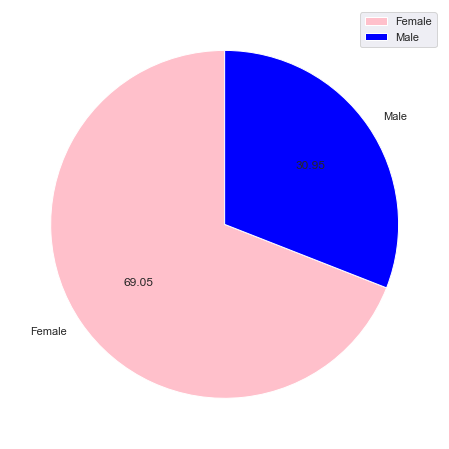

In [31]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=["Female","Male"],
        startangle = 90,
        colors=["pink","blue"],
        autopct='%.2f'
       );
plt.legend();

**Inference** :
Female patients who have a disease are greater than male patients.

#### 5 Distribution of Positive Cases Based on "Sick"

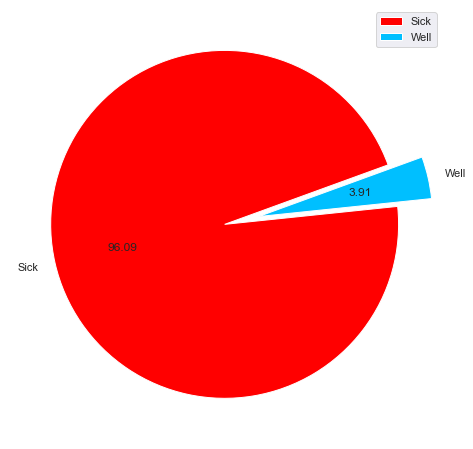

In [32]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['red','deepskyblue'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();


**Inference**: About 96% of patients who has a disease are sick.

### 3.7 Correlation
Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates a strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated. 

#### 1 Compute a correlation matrix

In [33]:
# use the corr() function to generate the correlation matrix of the numeric variables
df_corr = Thyroid_df.corr()

# print the correlation matrix
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Target
age,1.000000,-0.003550,0.017522,-0.018257,-0.066994,0.085228,-0.119454,-0.030546,0.056481,0.043314,...,-0.058470,0.074516,-0.227328,0.069999,-0.041380,0.088424,-0.170811,0.087554,0.054091,0.001729
sex,-0.003550,1.000000,0.095781,-0.044695,0.027298,-0.007403,0.078690,0.034566,0.022636,0.042735,...,0.033647,-0.071450,0.064220,-0.076907,0.167508,-0.051724,0.221784,-0.052595,0.041939,-0.050013
on thyroxine,0.017522,0.095781,1.000000,0.005983,-0.002212,-0.042074,0.010140,0.037572,0.063362,0.094389,...,0.017122,-0.145019,0.006483,0.024990,0.212835,0.038887,0.046445,0.038320,0.185732,0.081091
query on thyroxine,-0.018257,-0.044695,0.005983,1.000000,-0.012449,0.012588,0.045244,0.005855,-0.014614,-0.029816,...,-0.009458,-0.033395,-0.006466,0.029611,-0.004694,0.031561,0.000461,0.031431,-0.003556,0.007457
on antithyroid medication,-0.066994,0.027298,-0.002212,-0.012449,1.000000,-0.021630,0.072047,-0.012823,0.006586,-0.017271,...,-0.010673,0.010964,0.079212,-0.024642,0.023819,-0.029523,0.060390,-0.029779,-0.016609,0.021697
sick,0.085228,-0.007403,-0.042074,0.012588,-0.021630,1.000000,-0.024046,-0.000769,-0.025391,0.027704,...,-0.022108,0.006722,-0.076473,-0.005686,-0.036991,0.009417,-0.039033,0.009086,-0.021201,0.001764
pregnant,-0.119454,0.078690,0.010140,0.045244,0.072047,-0.024046,1.000000,-0.014255,-0.015052,-0.021372,...,-0.019699,0.026882,0.181146,0.021105,0.172501,0.032953,0.334750,0.032819,-0.016705,0.034526
thyroid surgery,-0.030546,0.034566,0.037572,0.005855,-0.012823,-0.000769,-0.014255,1.000000,0.003100,-0.012034,...,0.026225,-0.023438,-0.024146,0.030499,-0.021798,0.010683,0.027948,0.010498,-0.031835,0.017642
I131 treatment,0.056481,0.022636,0.063362,-0.014614,0.006586,-0.025391,-0.015052,0.003100,1.000000,0.047288,...,-0.004131,0.000167,0.012056,0.032205,-0.008839,0.028552,0.009431,0.028397,-0.016824,-0.003580
query hypothyroid,0.043314,0.042735,0.094389,-0.029816,-0.017271,0.027704,-0.021372,-0.012034,0.047288,1.000000,...,0.025967,-0.063515,-0.047498,0.024450,-0.008994,0.014540,0.013883,0.014123,-0.019734,-0.086264


#### 2 Plot the heatmap for the diagonal correlation matrix

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

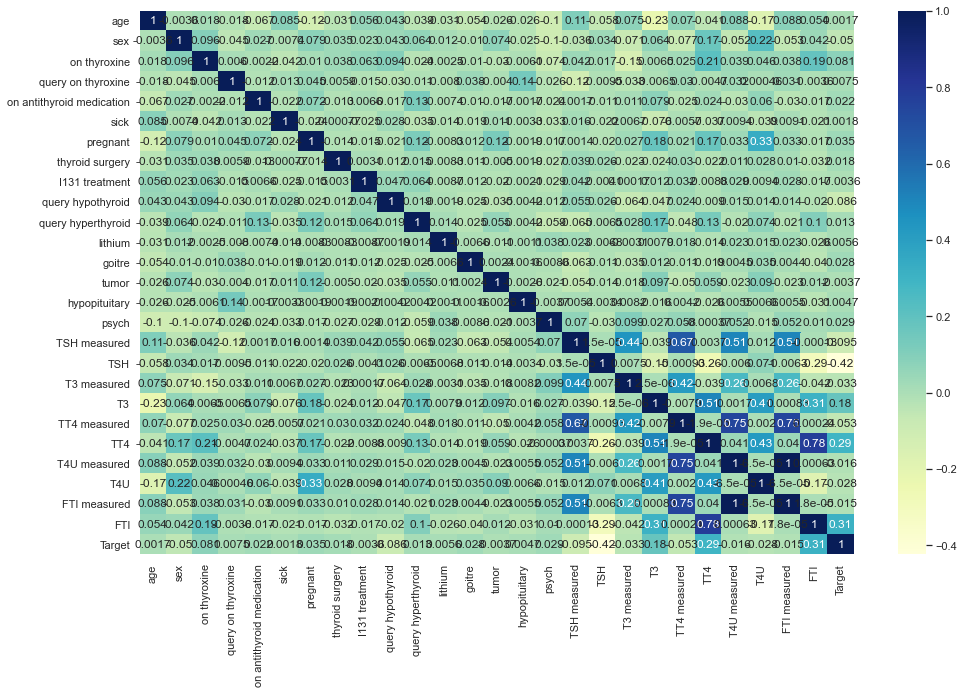

In [34]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot: prints the correlation values in the chart
plt.figure(figsize = (16,10))
sns.heatmap(Thyroid_df.corr(),annot=True, cmap="YlGnBu")  #YlGnBu - YellowGreenBlue
# to show the plot
plt.show()

**Inference**: From the above heatmap, it can be seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.78. 

Note: The diagonal values are always 1 because it is the correlation of the variable with itself.

In [35]:
#check for shape of dataframe
Thyroid_df.shape

(3771, 28)

### 3.7 Dummy encode the categorical variables

In [36]:
# use "get_dummies()"" from pandas to create dummy variables
# use "drop_first = True" to create (n-1) dummy variables
Thyroid_with_dummies = pd.get_dummies(Thyroid_df ,drop_first = True)

In [37]:
# check the first five observations of the data with dummy encoded variables
Thyroid_with_dummies.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4,T4U measured,T4U,FTI measured,FTI,Target,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
0,41.0,1.0,0,0,0,0,0,0,0,0,...,125.0,1,1.140,1,109.000000,1,1,0,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,102.0,0,0.995,0,110.469649,1,0,0,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,109.0,1,0.910,1,120.000000,1,0,0,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,175.0,0,0.995,0,110.469649,1,0,0,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,61.0,1,0.870,1,70.000000,1,0,0,1,0


## 4. Selecting important features based on Random Forest

Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the tree divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.
For classification, the measure of impurity is either the Gini impurity or the information gain/entropy.

### 4.1 Split the data into 75% test and 25% training

In [38]:
from sklearn.model_selection import train_test_split

X = Thyroid_with_dummies.drop("Target", axis=1)
y = Thyroid_df["Target"]

# Split the data into 75% test and 25% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2828, 30)
(943, 30)
(2828,)
(943,)


### 4.2 Train A Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
RF = RandomForestClassifier(n_estimators=10000, random_state=100, n_jobs=-1)

# Train the classifier
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=100)

In [40]:
feature_labels = X.columns.values

feature_importance = []
for feature in zip(feature_labels, RF.feature_importances_):
    feature_importance.append(feature)

feature_importance

# Print the name and gini importance of each feature

[('age', 0.03090291582606833),
 ('sex', 0.006490241217638395),
 ('on thyroxine', 0.051334222431928395),
 ('query on thyroxine', 0.00031745938407047467),
 ('on antithyroid medication', 0.0009916644804016908),
 ('sick', 0.0018530372919036493),
 ('pregnant', 0.00032294941980025765),
 ('thyroid surgery', 0.01803990493329041),
 ('I131 treatment', 0.0007919232624377634),
 ('query hypothyroid', 0.005592505008590963),
 ('query hyperthyroid', 0.0027234998676573955),
 ('lithium', 0.0005404272071055984),
 ('goitre', 0.000224554070863725),
 ('tumor', 0.001512318701175308),
 ('hypopituitary', 0.0),
 ('psych', 0.0014274786796571919),
 ('TSH measured', 0.002629297004864319),
 ('TSH', 0.5836930385671409),
 ('T3 measured', 0.0038254243415415785),
 ('T3', 0.042892250682316224),
 ('TT4 measured', 0.0008001173130823425),
 ('TT4', 0.09281707625703278),
 ('T4U measured', 0.0017463330290554931),
 ('T4U', 0.030763175635402748),
 ('FTI measured', 0.0018180124125173967),
 ('FTI', 0.10548349864174193),
 ('referr

### 4.3 Identify And Select Most Important Features

In [41]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(RF, threshold=0.02)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=100),
                threshold=0.02)

In [42]:
selected = []
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    selected.append(feature_labels[feature_list_index])
    
selected

['age', 'on thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

### 4.4 Visualizing Important Features using Random Forest 

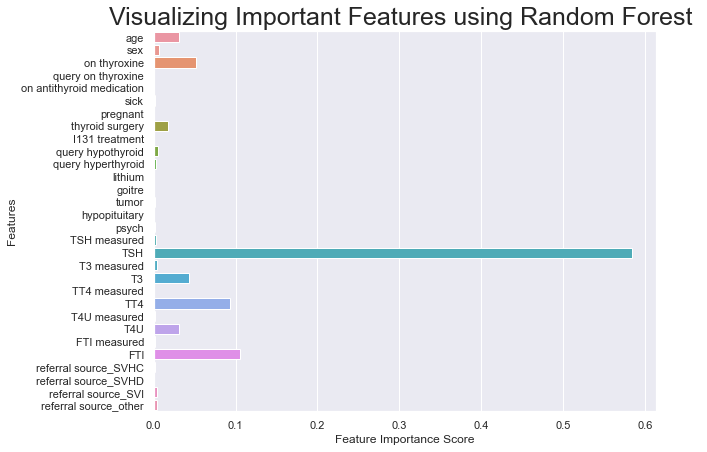

In [43]:
plt.figure(figsize=(9,7))
feature_imp1 = RF.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features using Random Forest ",{'fontsize':25})
plt.show()

### 4.5 Create A Data Subset With Only The Most Important Features

In [44]:
Thyroid_selected = Thyroid_df[selected]
Thyroid_selected.head()

,age,on thyroxine,TSH,T3,TT4,T4U,FTI
0,41.0,0,1.30,2.5000,125.0,1.140,109.000000
1,23.0,0,4.10,2.0000,102.0,0.995,110.469649
2,46.0,0,0.98,2.0135,109.0,0.910,120.000000
3,70.0,1,0.16,1.9000,175.0,0.995,110.469649
4,70.0,0,0.72,1.2000,61.0,0.870,70.000000


In [45]:
Thyroid_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3771 entries, 0 to 3771
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3771 non-null   float64
 1   on thyroxine  3771 non-null   int64  
 2   TSH           3771 non-null   float64
 3   T3            3771 non-null   float64
 4   TT4           3771 non-null   float64
 5   T4U           3771 non-null   float64
 6   FTI           3771 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 364.7 KB


## 5. Handling imbalanced data using SMOTE

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [46]:
X = Thyroid_selected
y = Thyroid_df["Target"]

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#summarize the new class distribution
Counter(y)

Counter({1: 3480, 0: 3480})

#### Visualizing target variable after applying SMOTE

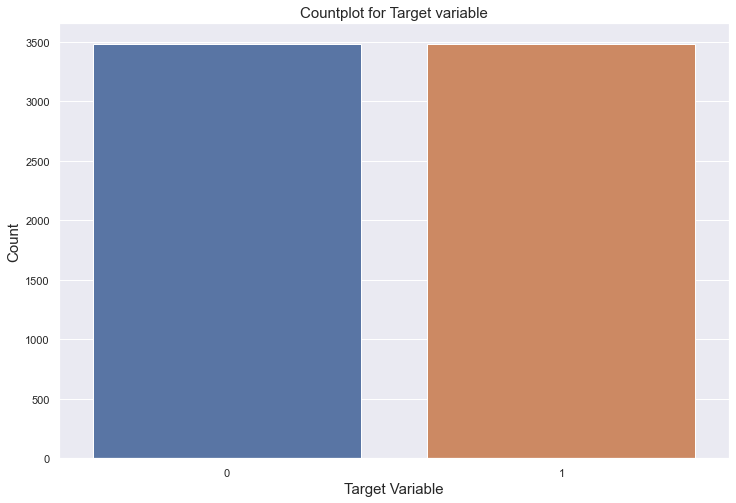

In [48]:
sns.countplot(x=y)
# add plot and axes labels
plt.title("Countplot for Target variable", fontsize = 15)
plt.xlabel("Target Variable", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# to show the plot
plt.show()

## 6. Standardize the data using minmax scaler

There is one way of data scaling, where the minimum feature is made equal to zero and the maximum feature equal to one. MinMax Scaler shrinks the data within the given range, usually from 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [49]:
catcols = ["on thyroxine"]
X[catcols] = X[catcols].astype("object")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6960 non-null   float64
 1   on thyroxine  6960 non-null   object 
 2   TSH           6960 non-null   float64
 3   T3            6960 non-null   float64
 4   TT4           6960 non-null   float64
 5   T4U           6960 non-null   float64
 6   FTI           6960 non-null   float64
dtypes: float64(6), object(1)
memory usage: 380.8+ KB


In [50]:
numcols = X.describe().columns
data_num = X[numcols]
data_num

,age,TSH,T3,TT4,T4U,FTI
0,41.000000,1.300000,2.500000,125.000000,1.140000,109.000000
1,23.000000,4.100000,2.000000,102.000000,0.995000,110.469649
2,46.000000,0.980000,2.013500,109.000000,0.910000,120.000000
3,70.000000,0.160000,1.900000,175.000000,0.995000,110.469649
4,70.000000,0.720000,1.200000,61.000000,0.870000,70.000000
...,...,...,...,...,...,...
6955,37.594555,12.000000,2.340544,83.405445,1.210272,69.189111
6956,58.752022,9.052089,2.647102,113.841757,1.012975,113.007981
6957,28.000000,93.833536,2.100000,62.193940,1.148776,54.129293
6958,48.494497,191.009784,0.999511,11.997554,1.169829,10.499389


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_num)

data_num[numcols] = scaler.fit_transform(data_num)
print(data_num.shape)

(6960, 6)


In [52]:
data_standardised = pd.concat([data_num, X[catcols]], axis=1)
data_standardised

,age,TSH,T3,TT4,T4U,FTI,on thyroxine
0,0.430108,0.002443,0.232227,0.287383,0.429952,0.272265,0
1,0.236559,0.007726,0.184834,0.233645,0.359903,0.276004,0
2,0.483871,0.001840,0.186114,0.250000,0.318841,0.300254,0
3,0.741935,0.000292,0.175355,0.404206,0.359903,0.276004,1
4,0.741935,0.001349,0.109005,0.137850,0.299517,0.173028,0
...,...,...,...,...,...,...,...
6955,0.393490,0.022632,0.217113,0.190200,0.463900,0.170965,0
6956,0.620989,0.017070,0.246171,0.261313,0.368587,0.282463,0
6957,0.290323,0.177037,0.194313,0.140640,0.434191,0.132645,0
6958,0.510694,0.360390,0.090001,0.023359,0.444362,0.021627,0


## 7. Build the following Supervised Learning models:

In [53]:
X = data_standardised
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4872, 7)
(2088, 7)
(4872,)
(2088,)


## 7.1.Logistic Regression

Logistic regression is another powerful supervised ML algorithm used for binary classification problems (when the target is categorical). It is a predictive analytic technique that is based on the probability idea. The goal of Logistic Regression is to discover a link between characteristics and the likelihood of a specific outcome.

The Logistic Regression utilizes a more sophisticated cost function, which is known as the “Sigmoid function” or “logistic function” instead of a linear function.

In [54]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression
logreg = LogisticRegression()

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression()

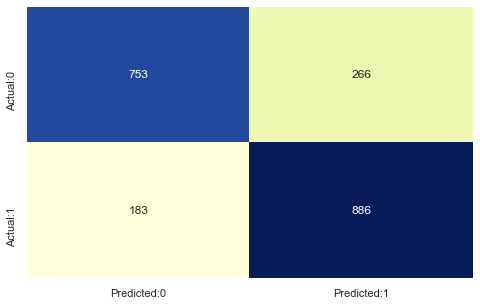

In [55]:
# Predicting the chance of disease 
y_pred_log = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
#label tje confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))
# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()

In [56]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function "classification_report"
# pass the LogisticRegression model to the function
result = classification_report(y_test, y_pred_log)

print(result)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1019
           1       0.77      0.83      0.80      1069

    accuracy                           0.78      2088
   macro avg       0.79      0.78      0.78      2088
weighted avg       0.79      0.78      0.78      2088



**Inference**: The accuracy is 78% for Logistic Regression model.

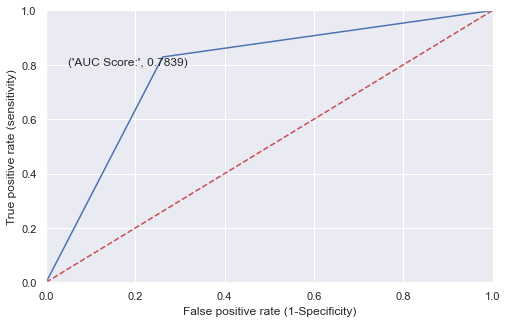

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_log)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_log),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

**Inference**: The dotted line represents the ROC curve of a purely random guess; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (Logistic Regression) to be away from the dotted line with the AUC score 0.78.

In [58]:
from sklearn import metrics
#create a list of column names
cols = ["Model", "AUC Score", "Precision Score", "Recall Score", "Accuracy Score", "f1-score"]

#creating the required information
result_tabulation = pd.DataFrame(columns=cols)


Logistic_regression = pd.Series({"Model" : "Logistic_regression", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_log),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_log),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_log),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_log),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_log)})
#appending our result table
result_tabulation = result_tabulation.append(Logistic_regression , ignore_index=True)


## 7.2. K-Nearest Neighbors

K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-nearst Neighbor classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

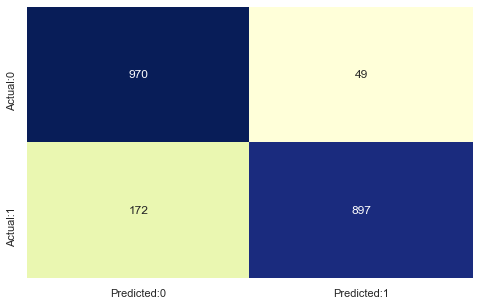

In [60]:
# Predicting the chance of disease
y_pred_KNN = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_KNN)
#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))
# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()

In [61]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function "classification_report"
# pass the KNN model to the function
result = classification_report(y_test, y_pred_KNN)

print(result)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1019
           1       0.95      0.84      0.89      1069

    accuracy                           0.89      2088
   macro avg       0.90      0.90      0.89      2088
weighted avg       0.90      0.89      0.89      2088



**Inference**: The accuracy is 89% for KNN model.

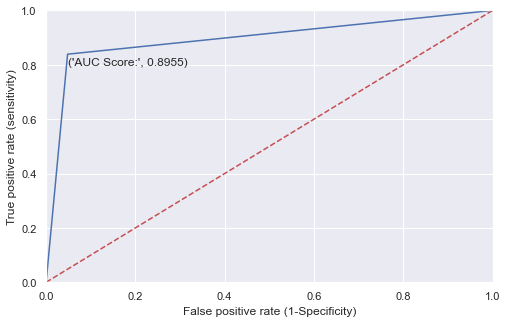

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_KNN)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_KNN),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

**Inference**: The dotted line represents the ROC curve of a purely random guess; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (KNN) to be away from the dotted line with the AUC score 0.89

In [63]:
KNN = pd.Series({"Model" : "KNN", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_KNN),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_KNN),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_KNN),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_KNN),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_KNN)})
#appending our result table
result_tabulation = result_tabulation.append(KNN , ignore_index=True)


## 7.3.Support Vector Machine

Support Vector Machine or SVM is a supervised and linear Machine Learning algorithm most commonly used for solving classification problems and is also referred to as Support Vector Classification. SVM also supports the kernel method also called the kernel SVM which allows us to tackle non-linearity.

The objective of SVM is to draw a line that best separates the two classes of data points. SVM generates a line that can cleanly separate the two classes. How clean, you may ask. There are many possible ways of drawing a line that separates the two classes, however, in SVM, it is determined by the margins and the support vectors. The SVM then generates a hyperplane that has the maximum margin. In the case of more than 2 features and multiple dimensions, the line is replaced by a hyperplane that separates multidimensional spaces.

In [64]:
from sklearn.svm import SVC

# Create a support vector classifier
svm = SVC(kernel='rbf', random_state=1)

# Training the model
svm.fit(X_train, y_train)

SVC(random_state=1)

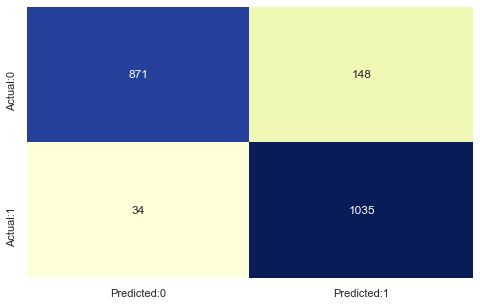

In [65]:
# Predicting the chance of disease
y_pred_svm = svm.predict(X_test)

from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))
# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()


In [66]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function "classification_report"
# pass the SVM model to the function
result = classification_report(y_test, y_pred_svm)

print(result)

              precision    recall  f1-score   support

           0       0.96      0.85      0.91      1019
           1       0.87      0.97      0.92      1069

    accuracy                           0.91      2088
   macro avg       0.92      0.91      0.91      2088
weighted avg       0.92      0.91      0.91      2088



**Inference**: The accuracy is 91% for SVM model.

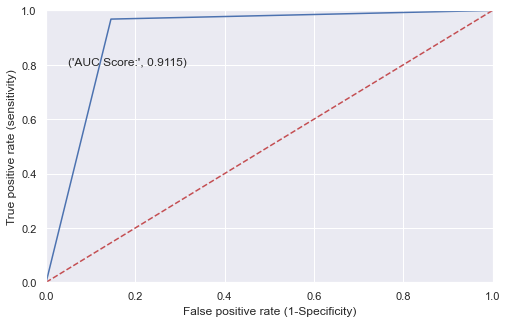

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_svm)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_svm),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

**Inference**: The dotted line represents the ROC curve of a purely random guess; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (SVM) to be away from the dotted line with the AUC score 0.91

In [68]:
SVM = pd.Series({"Model" : "SVM", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_svm),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_svm),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_svm),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_svm),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_svm)})
#appending our result table
result_tabulation = result_tabulation.append(SVM , ignore_index=True)


## 7.4. Decision Tree
A Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision. The topmost decision node in a tree that corresponds to the best predictor is called the 'root node'. The decision tree is built using different criteria like Gini index, and entropy.

To build the decision tree, we used the criterion of 'entropy'. Entropy is one of the criteria used to build the decision tree. It calculates the homogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided.

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5, min_samples_leaf = 4)

# Training the model 
clf_fit_2 = clf_gini.fit(X_train, y_train) 
clf_fit_2

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=100)

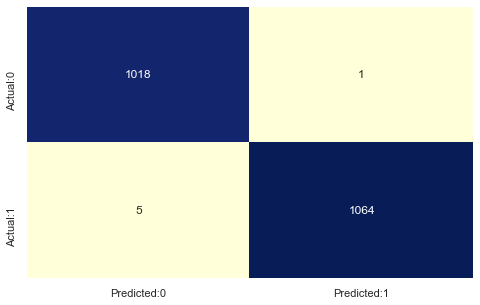

In [70]:
# Predicting the chance of disease
y_pred_dt = clf_fit_2.predict(X_test) 

from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
#set size of the plot
plt.figure(figsize=(8,5))
# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations

sns.heatmap(conf_matrix, annot=True, fmt= "d", cmap="YlGnBu", cbar=False)
plt.show()

In [71]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function "classification_report"
# pass the decision tree model to the function
result = classification_report(y_test, y_pred_dt)

print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           1       1.00      1.00      1.00      1069

    accuracy                           1.00      2088
   macro avg       1.00      1.00      1.00      2088
weighted avg       1.00      1.00      1.00      2088



**Inference**: The accuracy is 100% for Decision Tree model.

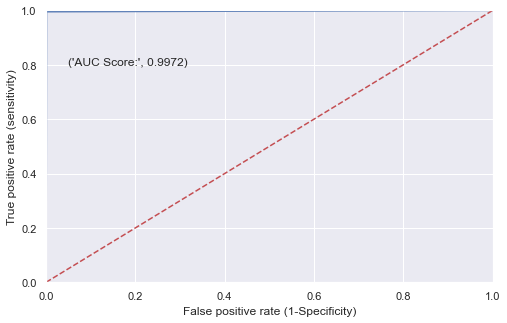

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#set the figure size
plt.rcParams["figure.figsize"]=(8,5)

fpr, tpr, thersholds = roc_curve(y_test, y_pred_dt)

#plot the ROC curve
plt.plot(fpr, tpr)

#set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

#plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],"r--")

#add the AUC score
plt.text(x=0.05, y = 0.8, s=("AUC Score:", round(roc_auc_score(y_test, y_pred_dt),4)))

#AUC or AUROC is area under ROC curve. The value of AUC tells us the model performance. Higher the AUC 
# better the model performance

#name the plot, and both axes
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (sensitivity)")

# plot the grid
plt.grid(True)

**Inference**: The dotted line represents the ROC curve of a purely random guess; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (decision tree) to be away from the dotted line with the AUC score 0.9972

In [73]:
decision_tree_entropy = pd.Series({"Model" : "decision_tree_entropy", 
                                    "AUC Score" : metrics.roc_auc_score(y_test, y_pred_dt),
                                    "Precision Score" : metrics.precision_score(y_test, y_pred_dt),
                                    "Recall Score" : metrics.recall_score(y_test, y_pred_dt),
                                    "Accuracy Score" : metrics.accuracy_score(y_test, y_pred_dt),
                                    "f1-score" : metrics.f1_score(y_test, y_pred_dt)})
#appending our result table
result_tabulation = result_tabulation.append(decision_tree_entropy , ignore_index=True)


## 8 Conclusion and Interpretation

To take the final conclusion, let us print the result table.

####  Tabulate the results

In [74]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic_regression,0.783886,0.769097,0.828812,0.784962,0.797839
1,KNN,0.895508,0.948203,0.839102,0.894157,0.890323
2,SVM,0.911477,0.874894,0.968195,0.912835,0.919183
3,decision_tree_entropy,0.997171,0.999061,0.995323,0.997126,0.997188


**Conclusion** :The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models was evaluated using the AUC score, accuracy, precision, recall, and  f1-score.

The above table shows that the Decision Tree has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree can be used to predict the existence of Hypothyroidism in patients.